_Lambda School Data Science — Tree Ensembles_ 

# Random Forests

### Pre-read
- [Scikit-Learn User Guide, Ensemble Methods](https://scikit-learn.org/stable/modules/ensemble.html)
- [Coloring with Random Forests](http://structuringtheunstructured.blogspot.com/2017/11/coloring-with-random-forests.html)
- [Beware Default Random Forest Importances](https://explained.ai/rf-importance/index.html)

### More
- [Machine Learning Explainability: Permutation Importance](https://www.kaggle.com/dansbecker/permutation-importance)
- [eli5: Permutation Importance](https://eli5.readthedocs.io/en/latest/blackbox/permutation_importance.html)
- [eli5: Explaining XGBoost predictions on the Titanic dataset](https://eli5.readthedocs.io/en/latest/_notebooks/xgboost-titanic.html)
- [The Mechanics of Machine Learning: Categorically Speaking](https://mlbook.explained.ai/catvars.html)


[Selecting good features – Part III: random forests](https://blog.datadive.net/selecting-good-features-part-iii-random-forests/)
>There are a few things to keep in mind when using the impurity based ranking. Firstly, feature selection based on impurity reduction is biased towards preferring variables with more categories. 
>
>Secondly, when the dataset has two (or more) correlated features, then from the point of view of the model, any of these correlated features can be used as the predictor, with no concrete preference of one over the others. But once one of them is used, the importance of others is significantly reduced since effectively the impurity they can remove is already removed by the first feature. As a consequence, they will have a lower reported importance. This is not an issue when we want to use feature selection to reduce overfitting, since it makes sense to remove features that are mostly duplicated by other features. But when interpreting the data, it can lead to the incorrect conclusion that one of the variables is a strong predictor while the others in the same group are unimportant, while actually they are very close in terms of their relationship with the response variable.


[An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/), Chapter 8.2.1, Out-of-Bag Error Estimation

> It turns out that **there is a very straightforward way to estimate the test error of a bagged model, without the need to perform cross-validation or the validation set approach.** 
>
> Recall that the key to bagging is that trees are repeatedly fit to bootstrapped subsets of the observations. One can show that on average, each bagged tree makes use of around two-thirds of the observations. The remaining one-third of the **observations not used to fit a given bagged tree are referred to as the out-of bag (OOB) observations.**
>
>We can predict the response for the ith observation using each of the trees in which that observation was OOB. This will yield around B/3 predictions for the ith observation. In order to obtain a single prediction for the ith observation, we can average these predicted responses (if regression is the goal) or can take a majority vote (if classification is the goal). 
>
>This leads to a single OOB prediction for the ith observation. An OOB prediction can be obtained in this way for each of the n observations, from which the overall OOB MSE (for a regression problem) or classification error (for a classification problem) can be computed. The resulting **OOB error is a valid estimate of the test error for the bagged model, since the response for each observation is predicted using only the trees that were not fit using that observation.** ... 
>
>It can be shown that with B sufficiently large, OOB error is virtually equivalent to leave-one-out cross-validation error. The OOB approach for estimating the test error is particularly **convenient when performing bagging on large data sets for which cross-validation would be computationally onerous.**

## Libraries
- [eli5](https://github.com/TeamHG-Memex/eli5): `conda install -c conda-forge eli5` / `pip install eli5`
- [category_encoders](https://github.com/scikit-learn-contrib/categorical-encoding): `conda install -c conda-forge category_encoders` / `pip install category_encoders`
- [mlxtend](https://github.com/rasbt/mlxtend): `pip install mlxtend`
- [ipywidgets](https://ipywidgets.readthedocs.io/en/stable/examples/Using%20Interact.html): included with Anaconda, doesn't work on Google Colab

## ipywidgets revisited: Decision Tree vs Random Forest

### Regressing a wave

In [1]:
%matplotlib inline
from ipywidgets import interact
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Example from http://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html
def make_data():
    import numpy as np
    rng = np.random.RandomState(1)
    X = np.sort(5 * rng.rand(80, 1), axis=0)
    y = np.sin(X).ravel()
    y[::5] += 2 * (0.5 - rng.rand(16))
    return X, y

X, y = make_data()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

def regress_wave(max_depth):
    dt = DecisionTreeRegressor(max_depth=max_depth)
    dt.fit(X_train, y_train)
    print('Decision Tree train R^2:', dt.score(X_train, y_train))
    print('Decision Tree test R^2:', dt.score(X_test, y_test))
    plt.scatter(X_train, y_train)
    plt.scatter(X_test, y_test)
    plt.step(X, dt.predict(X))
    plt.show()
    
    rf = RandomForestRegressor(max_depth=max_depth, n_estimators=100, n_jobs=-1)
    rf.fit(X_train, y_train)
    print('Random Forest train R^2:', rf.score(X_train, y_train))
    print('Random Forest test R^2:', rf.score(X_test, y_test))
    plt.scatter(X_train, y_train)
    plt.scatter(X_test, y_test)
    plt.step(X, rf.predict(X))
    plt.show()
    
interact(regress_wave, max_depth=(1,8,1));

interactive(children=(IntSlider(value=4, description='max_depth', max=8, min=1), Output()), _dom_classes=('wid…

### Titanic survival, by Age & Fare

In [2]:
from mlxtend.plotting import plot_decision_regions
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier

titanic = sns.load_dataset('titanic')
X = SimpleImputer().fit_transform(titanic[['age', 'fare']])
y = titanic['survived'].values

def classify_titanic(max_depth):
    dt = DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(X, y)
    plot_decision_regions(X, y, dt)
    plt.title('Decision Tree')
    plt.axis((0,75,0,175))
    plt.show()

    rf = RandomForestClassifier(max_depth=max_depth, n_estimators=100, n_jobs=-1)
    rf.fit(X, y)
    plot_decision_regions(X, y, rf)
    plt.title('Random Forest')
    plt.axis((0,75,0,175))
    plt.show()
    
interact(classify_titanic, max_depth=(1,8,1));

interactive(children=(IntSlider(value=4, description='max_depth', max=8, min=1), Output()), _dom_classes=('wid…

# Lending Club

Read csv files downloaded from [Kaggle](https://www.kaggle.com/c/ds1-tree-ensembles/data)

In [3]:
import pandas as pd
pd.options.display.max_columns = 200
pd.options.display.max_rows = 200

X_train = pd.read_csv('train_features.csv')
X_test = pd.read_csv('test_features.csv')
y_train = pd.read_csv('train_labels.csv')['charged_off']
sample_submission = pd.read_csv('sample_submission.csv')

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((37745, 103), (9437, 103), (37745,), (20,))

Wrangle X_train and X_test in the same way

In [4]:
def wrangle(X):
    X = X.copy()
    
    # Drop some columns
    X = X.drop(columns='id')  # id is random
    X = X.drop(columns=['member_id', 'url', 'desc'])  # All null
    X = X.drop(columns='title')  # Duplicative of purpose
    X = X.drop(columns='grade')  # Duplicative of sub_grade
    
    # Transform sub_grade from "A1" - "G5" to 1.1 - 7.5
    def wrangle_sub_grade(x):
        first_digit = ord(x[0]) - 64
        second_digit = int(x[1])
        return first_digit + second_digit/10
    
    X['sub_grade'] = X['sub_grade'].apply(wrangle_sub_grade)

    # Convert percentages from strings to floats
    X['int_rate'] = X['int_rate'].str.strip('%').astype(float)
    X['revol_util'] = X['revol_util'].str.strip('%').astype(float)
        
    # Transform earliest_cr_line to an integer: how many days it's been open
    X['earliest_cr_line'] = pd.to_datetime(X['earliest_cr_line'], infer_datetime_format=True)
    X['earliest_cr_line'] = pd.Timestamp.today() - X['earliest_cr_line']
    X['earliest_cr_line'] = X['earliest_cr_line'].dt.days
    
    # Create features for three employee titles: teacher, manager, owner
    X['emp_title'] = X['emp_title'].str.lower()
    X['emp_title_teacher'] = X['emp_title'].str.contains('teacher', na=False)
    X['emp_title_manager'] = X['emp_title'].str.contains('manager', na=False)
    X['emp_title_owner']   = X['emp_title'].str.contains('owner', na=False)
    
    # Drop categoricals with high cardinality
    X = X.drop(columns=['emp_title', 'zip_code'])
    
    # Transform features with many nulls to binary flags
    many_nulls = ['sec_app_mths_since_last_major_derog',
                  'sec_app_revol_util',
                  'sec_app_earliest_cr_line',
                  'sec_app_mort_acc',
                  'dti_joint',
                  'sec_app_collections_12_mths_ex_med',
                  'sec_app_chargeoff_within_12_mths',
                  'sec_app_num_rev_accts',
                  'sec_app_open_act_il',
                  'sec_app_open_acc',
                  'revol_bal_joint',
                  'annual_inc_joint',
                  'sec_app_inq_last_6mths',
                  'mths_since_last_record',
                  'mths_since_recent_bc_dlq',
                  'mths_since_last_major_derog',
                  'mths_since_recent_revol_delinq',
                  'mths_since_last_delinq',
                  'il_util',
                  'emp_length',
                  'mths_since_recent_inq',
                  'mo_sin_old_il_acct',
                  'mths_since_rcnt_il',
                  'num_tl_120dpd_2m',
                  'bc_util',
                  'percent_bc_gt_75',
                  'bc_open_to_buy',
                  'mths_since_recent_bc']

    for col in many_nulls:
        X[col] = X[col].isnull()
    
    # For features with few nulls, do mean imputation
    for col in X:
        if X[col].isnull().sum() > 0:
            X[col] = X[col].fillna(X[col].mean())
    
    # Return the wrangled dataframe
    return X


X_train = wrangle(X_train)
X_test  = wrangle(X_test)
X_train.shape, X_test.shape

((37745, 98), (9437, 98))

Now X_train (and X_test) have no nulls

In [5]:
null_counts = X_train.isnull().sum()
all(null_counts == 0)

True

And no high cardinality categoricals

In [7]:
cardinality = X_train.select_dtypes(exclude='number').nunique()
all(cardinality <= 50)

True

## Decision Tree

In [8]:
import category_encoders as ce
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier

pipe = make_pipeline(
    ce.OrdinalEncoder(), 
    DecisionTreeClassifier(max_depth=5, class_weight='balanced')
)

cross_val_score(pipe, X_train, y_train, cv=5, scoring='roc_auc')

array([0.70297128, 0.70044493, 0.69332495, 0.68879982, 0.68917646])

## Random Forest
Improves ROC AUC compared to Decision Tree

In [9]:
from sklearn.ensemble import RandomForestClassifier

pipe = make_pipeline(
    ce.OrdinalEncoder(), 
    RandomForestClassifier(
        n_estimators=100, 
        class_weight='balanced', 
        min_samples_leaf=0.005, 
        oob_score=True, 
        n_jobs=-1)
)

cross_val_score(pipe, X_train, y_train, cv=5, scoring='roc_auc', verbose=10)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] ....................... , score=0.7262689151350296, total=   4.3s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.3s remaining:    0.0s


[CV] ....................... , score=0.7272850304601756, total=   2.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.4s remaining:    0.0s


[CV] ....................... , score=0.7232372817896887, total=   2.2s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    8.6s remaining:    0.0s


[CV] ....................... , score=0.7296668157030054, total=   2.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   10.7s remaining:    0.0s


[CV] ....................... , score=0.7370136212633883, total=   2.3s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   13.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   13.0s finished


array([0.72626892, 0.72728503, 0.72323728, 0.72966682, 0.73701362])

## Out-of-Bag estimated score

Out-of-bag is a faster way to get an estimated score with Random Forest, using the parameter `oob_score=True`

In [10]:
from sklearn.metrics import roc_auc_score

In [11]:
%%time
pipe.fit(X_train, y_train)
y_pred_proba = pipe.named_steps['randomforestclassifier'].oob_decision_function_[:, 1]
print('ROC AUC, Out-of-Bag estimate:', roc_auc_score(y_train, y_pred_proba))



ROC AUC, Out-of-Bag estimate: 0.7268364787072195
CPU times: user 12.7 s, sys: 244 ms, total: 13 s
Wall time: 2.37 s


You can explore hyperparameter values

In [12]:
%%time

max_depths = list(range(2, 12, 2)) + [None]

for max_depth in max_depths:
    
    pipe = make_pipeline(
        ce.OrdinalEncoder(), 
        RandomForestClassifier(
            n_estimators=100, 
            class_weight='balanced', 
            max_depth=max_depth, 
            oob_score=True, 
            n_jobs=-1
        )
    )
        
    pipe.fit(X_train, y_train)
    y_pred_proba = pipe.named_steps['randomforestclassifier'].oob_decision_function_[:, 1]
    print('Max Depth:', max_depth)
    print('ROC AUC, OOB:', roc_auc_score(y_train, y_pred_proba))
    
    

Max Depth: 2
ROC AUC, OOB: 0.7021854846019617
Max Depth: 4
ROC AUC, OOB: 0.714527750041454
Max Depth: 6
ROC AUC, OOB: 0.7225018674826044
Max Depth: 8
ROC AUC, OOB: 0.7246084645989094
Max Depth: 10
ROC AUC, OOB: 0.7214656617163979
Max Depth: None
ROC AUC, OOB: 0.7028478974081679
CPU times: user 1min 18s, sys: 1.48 s, total: 1min 20s
Wall time: 15.3 s


## Feature Importances

We can look at feature importances. [But remember:](https://blog.datadive.net/selecting-good-features-part-iii-random-forests/)

>Firstly, feature selection based on impurity reduction is biased towards preferring variables with more categories.
>
>Secondly, when the dataset has two (or more) correlated features, then from the point of view of the model, any of these correlated features can be used as the predictor, with no concrete preference of one over the others. 

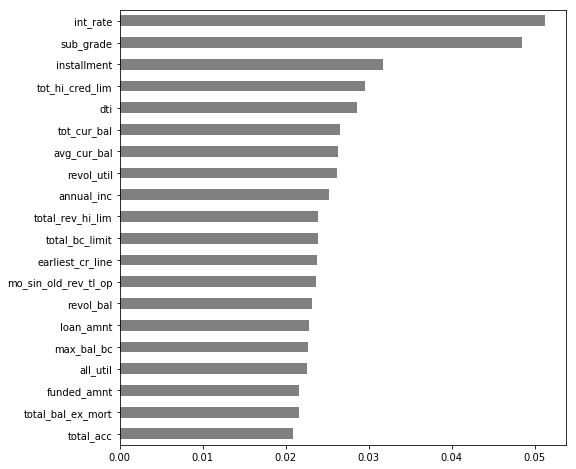

In [13]:
def show_feature_importances(
    pipe, X, y, estimator_name='randomforestclassifier', 
    n=20, figsize=(8, 8)):
    
    # pipe must not change dimensions of X dataframe
    pipe.fit(X, y)
    
    importances = pd.Series(
        pipe.named_steps[estimator_name].feature_importances_, 
        X.columns)

    top_n = importances.sort_values(ascending=False)[:n]
    
    plt.figure(figsize=figsize)
    top_n.sort_values().plot.barh(color='grey')

    
show_feature_importances(pipe, X_train, y_train)

## Drop Column Importance / "Ablation Study"

`sub_grade` and `int_rate` are highly correlated. If we drop one of those features, the model uses the other more, so the score remains similar.

In [14]:
cross_val_score(pipe, X_train.drop(columns='sub_grade'), y_train, cv=5, scoring='roc_auc')



array([0.71920589, 0.71784108, 0.72247581, 0.7150846 , 0.72554498])

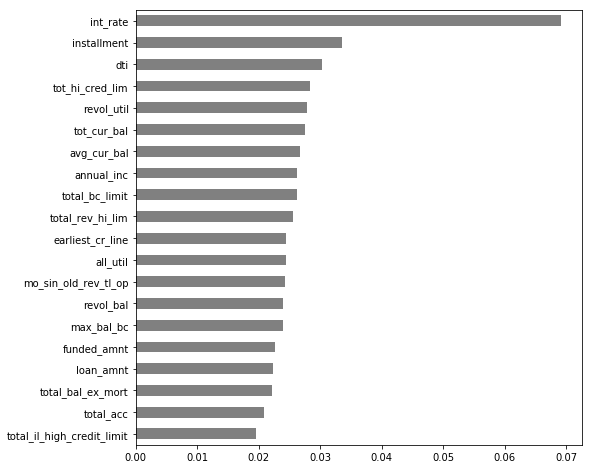

In [15]:
show_feature_importances(pipe, X_train.drop(columns='sub_grade'), y_train)


But if we drop _both_ features, then the score decreases:

In [16]:
cross_val_score(pipe, X_train.drop(columns=['sub_grade', 'int_rate']), y_train, cv=5, scoring='roc_auc')



array([0.70238724, 0.69620403, 0.69929053, 0.70917935, 0.69917305])

For more information, see [Beware Default Random Forest Importances](https://explained.ai/rf-importance/index.html).

# Permutation Importance

Permutation Importance is a compromise between Feature Importance based on impurity reduction (which is the fastest) and Drop Column Importance (which is the "best.")

[The ELI5 library documentation explains,](https://eli5.readthedocs.io/en/latest/blackbox/permutation_importance.html)

> Importance can be measured by looking at how much the score (accuracy, F1, R^2, etc. - any score we’re interested in) decreases when a feature is not available.
>
> To do that one can remove feature from the dataset, re-train the estimator and check the score. But it requires re-training an estimator for each feature, which can be computationally intensive. ...
>
>To avoid re-training the estimator we can remove a feature only from the test part of the dataset, and compute score without using this feature. It doesn’t work as-is, because estimators expect feature to be present. So instead of removing a feature we can replace it with random noise - feature column is still there, but it no longer contains useful information. This method works if noise is drawn from the same distribution as original feature values (as otherwise estimator may fail). The simplest way to get such noise is to shuffle values for a feature, i.e. use other examples’ feature values - this is how permutation importance is computed.
>
>The method is most suitable for computing feature importances when a number of columns (features) is not huge; it can be resource-intensive otherwise.

For more documentation on using this library, see:
- [eli5.sklearn.PermutationImportance](https://eli5.readthedocs.io/en/latest/autodocs/sklearn.html#eli5.sklearn.permutation_importance.PermutationImportance)
- [eli5.show_weights](https://eli5.readthedocs.io/en/latest/autodocs/eli5.html#eli5.show_weights)

In [17]:
%%time
import eli5
from eli5.sklearn import PermutationImportance

encoder = ce.OrdinalEncoder()
X_train_transformed = encoder.fit_transform(X_train)

model = RandomForestClassifier(
    n_estimators=100, 
    class_weight='balanced', 
    min_samples_leaf=0.005, 
    n_jobs=-1)

model.fit(X_train_transformed, y_train)
permuter = PermutationImportance(model, scoring='roc_auc', n_iter=1, cv='prefit')
permuter.fit(X_train_transformed, y_train)

CPU times: user 1min 38s, sys: 3.06 s, total: 1min 41s
Wall time: 17.2 s


In [18]:
eli5.show_weights(permuter, top=None, feature_names=X_train_transformed.columns.tolist())



Weight,Feature
0.0221 ± 0.0000,int_rate
0.0211 ± 0.0000,sub_grade
0.0097 ± 0.0000,installment
0.0079 ± 0.0000,funded_amnt
0.0073 ± 0.0000,loan_amnt
0.0068 ± 0.0000,dti
0.0064 ± 0.0000,tot_cur_bal
0.0046 ± 0.0000,num_il_tl
0.0045 ± 0.0000,tot_hi_cred_lim
0.0037 ± 0.0000,home_ownership


We can use Permutation Importance weights for feature selection. For example, we can remove features with zero weight. The model trains faster and the score does not decrease.

In [19]:
subset = X_train.columns[permuter.feature_importances_ > 0]
cross_val_score(pipe, X_train[subset], y_train, cv=5, scoring='roc_auc', verbose=10)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] ........................ , score=0.722493401693019, total=   5.6s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.6s remaining:    0.0s


[CV] ....................... , score=0.7220340859808255, total=   3.5s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.1s remaining:    0.0s


[CV] ....................... , score=0.7209826527853158, total=   3.7s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   12.8s remaining:    0.0s


[CV] ....................... , score=0.7175976684341314, total=   3.2s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   15.9s remaining:    0.0s


[CV] ....................... , score=0.7153366553879137, total=   3.5s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   19.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   19.4s finished


array([0.7224934 , 0.72203409, 0.72098265, 0.71759767, 0.71533666])